This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environement

In [22]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import RawToUDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Datasets

In [23]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
dataset = RawToUDDataset(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
dataset.write(ud_file)

In [24]:
analyzer = UDAnalyzer()

In [25]:
analyzer.analyze_dataset_len(dataset)

Number of sentences 500


In [26]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [27]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 52


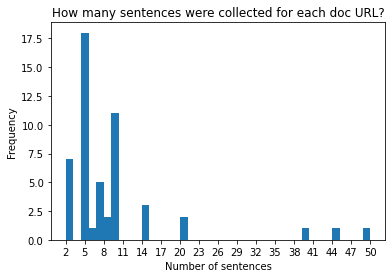

In [28]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [29]:
doc_word_freqs = analyzer.get_doc_word_freq(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
{k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:30]}

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.10321948691506366,
 'của': 0.136219747017989,
 'là': 0.136219747017989,
 'các': 0.1478016195678042,
 'được': 0.15970084286751188,
 'cho': 0.17193529928452353,
 'với': 0.184524426592544,
 'trong': 0.184524426592544,
 'từ': 0.19748940375691165,
 'người': 0.21085336531489318,
 'có': 0.21085336531489318,
 'đã': 0.2246416498005265,
 'đó': 0.26884531229257996,
 'này': 0.26884531229257996,
 'theo': 0.26884531229257996,
 'không': 0.26884531229257996,
 'nhiều': 0.2846395794758118,
 'ở': 0.3010299956639812,
 'vào': 0.3010299956639812,
 'để': 0.3010299956639812,
 'năm': 0.31806333496276157,
 '(': 0.31806333496276157,
 ')': 0.31806333496276157,
 'cũng': 0.31806333496276157,
 'những': 0.3357921019231931,
 'đến': 0.3357921019231931,
 'một': 0.3357921019231931,
 'khi': 0.3542755076172063}

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [30]:
counter = analyzer.analyze_words(dataset)

Most common words
[(',', 617), ('.', 470), ('và', 138), ('của', 131), ('không', 105), ('là', 103), ('với', 103), ('trong', 103), ('cho', 96), ('được', 93), ('người', 92), ('có', 88), ('các', 87), ('đến', 80), ('những', 77), ('để', 72), ('đã', 68), ('một', 64), ('từ', 61), ('khi', 59), ('nhiều', 57), ('"', 57), ('ở', 53), ('này', 53), ('ngày', 53), ('cũng', 51), ('vào', 50), ('năm', 50), ('anh', 48), ('điểm', 48), ('phải', 47), ('như', 46), ('ông', 46), ('(', 45), (')', 45), ('đó', 44), ('tôi', 44), ('theo', 40), ('mình', 38), ('nhưng', 37), ('mới', 37), ('về', 37), ('đi', 37), ('2', 35), ('sau', 34), ('việt nam', 34), ('tuyển', 34), ('chỉ', 33), ('cả', 33), ('còn', 33)]
Corpus words:  2529
OOV words
{'nói bộ', 'app', 'bundesglia', 'tiệm', 'marcus rashford', 'tivi', 'afghanistan ashraf ghani', 'chăng dây', 'nguyễn tất thành', '17', 'hóa học', 'morphin', '2020', '!', 'đóa', 'mexico', "' tập 85", '26/9', 'atm', 'zlatko cajkovski', '70', '2016', 'luke shaw', 'tú cầu', 'park', 'tajikistan',

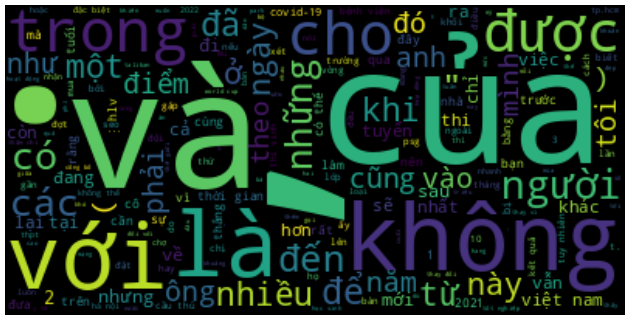

In [31]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [32]:
counter = analyzer.analyze_today_words(dataset)

Most common words
[(',', 246), ('.', 199), ('của', 69), ('và', 62), ('với', 61), ('trong', 47), ('là', 45), ('không', 43), ('ông', 40), ('đến', 40), ('những', 40), ('cho', 39), ('các', 38), ('người', 36), ('có', 34), ('để', 34), ('được', 31), ('đã', 28), ('việt nam', 27), ('từ', 27), ('một', 27), ('khi', 26), ('nhiều', 26), ('năm', 25), ('hlv', 25), ('về', 23), ('ở', 22), ('hơn', 22), ('"', 22), ('phải', 21), ('anh', 19), ('nhưng', 19), ('vào', 19), ('sẽ', 19), ('như', 19), ('còn', 18), ('cũng', 18), ('đang', 18), ('mới', 18), ('làm', 17), ('đó', 17), ('tuyển', 17), ('này', 16), ('cầu thủ', 16), ('bàn', 15), ('sự', 14), ('ấy', 14), ('seo', 14), ('theo', 13), ('trên', 13)]
Corpus words:  1352
OOV words
{'17/8', 'nói bộ', 'henry', 'bundesglia', 'tiệm', 'liverpool', 'cơm dẻo', '180', 'bên cạnh', 'bernabeu', 'tivi', 'marcus rashford', '1,5', 'donnarumma', 'tiktok', 'nha', 'cristiano ronaldo', 'cho đến', 'rashford', 'dị nhân', 'morphin', '...', 'la liga', 'der bomber', '2020', 'man city bán

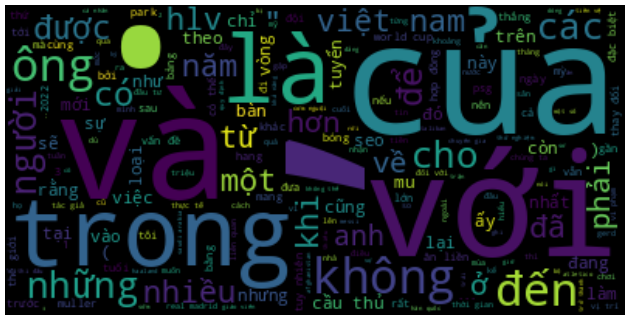

In [33]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)